In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Define the alpha value for the post-plasma materials
alpha = 0.65

# Define the color for each material
cb_colors = {
    'γ-Al₂O₃': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃': (213/255, 94/255, 0/255),

    'γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% CuO@γ-Al₂O₃ pre-plasma': (
        (86 * alpha + 255 * (1 - alpha)) / 255,
        (180 * alpha + 255 * (1 - alpha)) / 255,
        (233 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃\npre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (230 * alpha + 255 * (1 - alpha)) / 255,
        (159 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (213 * alpha + 255 * (1 - alpha)) / 255,
        (94 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    'γ-Al₂O₃ post-plasma': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃ post-plasma': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃ post-plasma': (0/255, 114/255, 178/255),
    '10% CuO@γ-Al₂O₃\npost-plasma': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma': (213/255, 94/255, 0/255)
}

# determine order of materials for plotting
material_order = [
    'γ-Al₂O₃',
    '2% CuO@γ-Al₂O₃',
    '2% Fe₂O₃@γ-Al₂O₃',
    '10% CuO@γ-Al₂O₃',
    '10% Fe₂O₃@γ-Al₂O₃',
    'γ-Al₂O₃ pre-plasma',
    '2% CuO@γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    'γ-Al₂O₃ post-plasma',
    '2% CuO@γ-Al₂O₃ post-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma',
    '10% CuO@γ-Al₂O₃ post-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

In [3]:
# Define the path to the Excel file
excel_file_path = (
    r'N:\FWET\FDCH\AdsCatal\General\personal_work_folders'
    r'\plasmacatdesign\materials\ugent\ugent-tpr-h2.xlsx'
)

# Read all worksheets in the Excel file into a dictionary of DataFrames
data = pd.read_excel(
    excel_file_path,
    sheet_name=['h2_tpr', 'h2_tpr_fitting', 'summary']
)

# Assign each DataFrame to a separate variable
h2_tpr_data = data['h2_tpr']
fitting_data = data['h2_tpr_fitting']
summary_data = data['summary']

In [4]:
# Normalize the data based on the sample mass (g) used
# for each measurement
h2_tpr_data['signal_tcd_au_normalized'] = (
    h2_tpr_data['signal_tcd_au'] / h2_tpr_data['mass_sample_g']
)

In [5]:
# Separate dataframes for copper and iron based on materials
Cu_materials = ['γ-Al₂O₃', '2% CuO@γ-Al₂O₃', '10% CuO@γ-Al₂O₃']
Fe_materials = ['γ-Al₂O₃', '2% Fe₂O₃@γ-Al₂O₃', '10% Fe₂O₃@γ-Al₂O₃']
h2_tpr_data_Cu = h2_tpr_data[h2_tpr_data['material'].isin(Cu_materials)].copy()
h2_tpr_data_Fe = h2_tpr_data[h2_tpr_data['material'].isin(Fe_materials)].copy()

In [6]:
# Define a function to scale and flatten using the fitted scaler
def scale_and_flatten(series):
    return scaler.transform(series.values.reshape(-1, 1)).flatten()

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the data for copper using 10% CuO@γ-Al₂O₃ for fitting
fit_group = h2_tpr_data_Cu[h2_tpr_data_Cu['material'] == '10% CuO@γ-Al₂O₃']
scaler.fit(fit_group['signal_tcd_au_normalized'].values.reshape(-1, 1))

# Apply the scaler to 'signal_tcd_au_normalized' within each group
h2_tpr_data_Cu['signal_tcd_au_scaled'] = (
    h2_tpr_data_Cu
    .groupby(['material', 'plasma'])['signal_tcd_au_normalized']
    .transform(scale_and_flatten)
)

In [7]:
# Fit the scaler to a specific subgroup
fit_group = h2_tpr_data_Fe[h2_tpr_data_Fe['material'] == '10% Fe₂O₃@γ-Al₂O₃']
scaler.fit(fit_group['signal_tcd_au_normalized'].values.reshape(-1, 1))

# Apply the scaler to 'signal_tcd_au_normalized' within each group
h2_tpr_data_Fe['signal_tcd_au_scaled'] = (
    h2_tpr_data_Fe
    .groupby(['material', 'plasma'])['signal_tcd_au_normalized']
    .transform(scale_and_flatten)
)

In [8]:
# Shift the data for copper
shift_values = {
    'γ-Al₂O₃': 0.100,
    '2% CuO@γ-Al₂O₃': 0.320,
    '10% CuO@γ-Al₂O₃': 0.605
}

h2_tpr_data_Cu['signal_tcd_au_scaled_shifted'] = (
    h2_tpr_data_Cu['signal_tcd_au_scaled']
)

for material, shift in shift_values.items():
    h2_tpr_data_Cu.loc[h2_tpr_data_Cu['material'] == material,
                       'signal_tcd_au_scaled_shifted'] += shift

In [9]:
# Shift the data for iron
shift_values = {
    'γ-Al₂O₃': 0.125,
    '2% Fe₂O₃@γ-Al₂O₃': 0.351,
    '10% Fe₂O₃@γ-Al₂O₃': 0.620
}

h2_tpr_data_Fe['signal_tcd_au_scaled_shifted'] = (
    h2_tpr_data_Fe['signal_tcd_au_scaled']
)

for material, shift in shift_values.items():
    h2_tpr_data_Fe.loc[h2_tpr_data_Fe['material'] == material,
                       'signal_tcd_au_scaled_shifted'] += shift

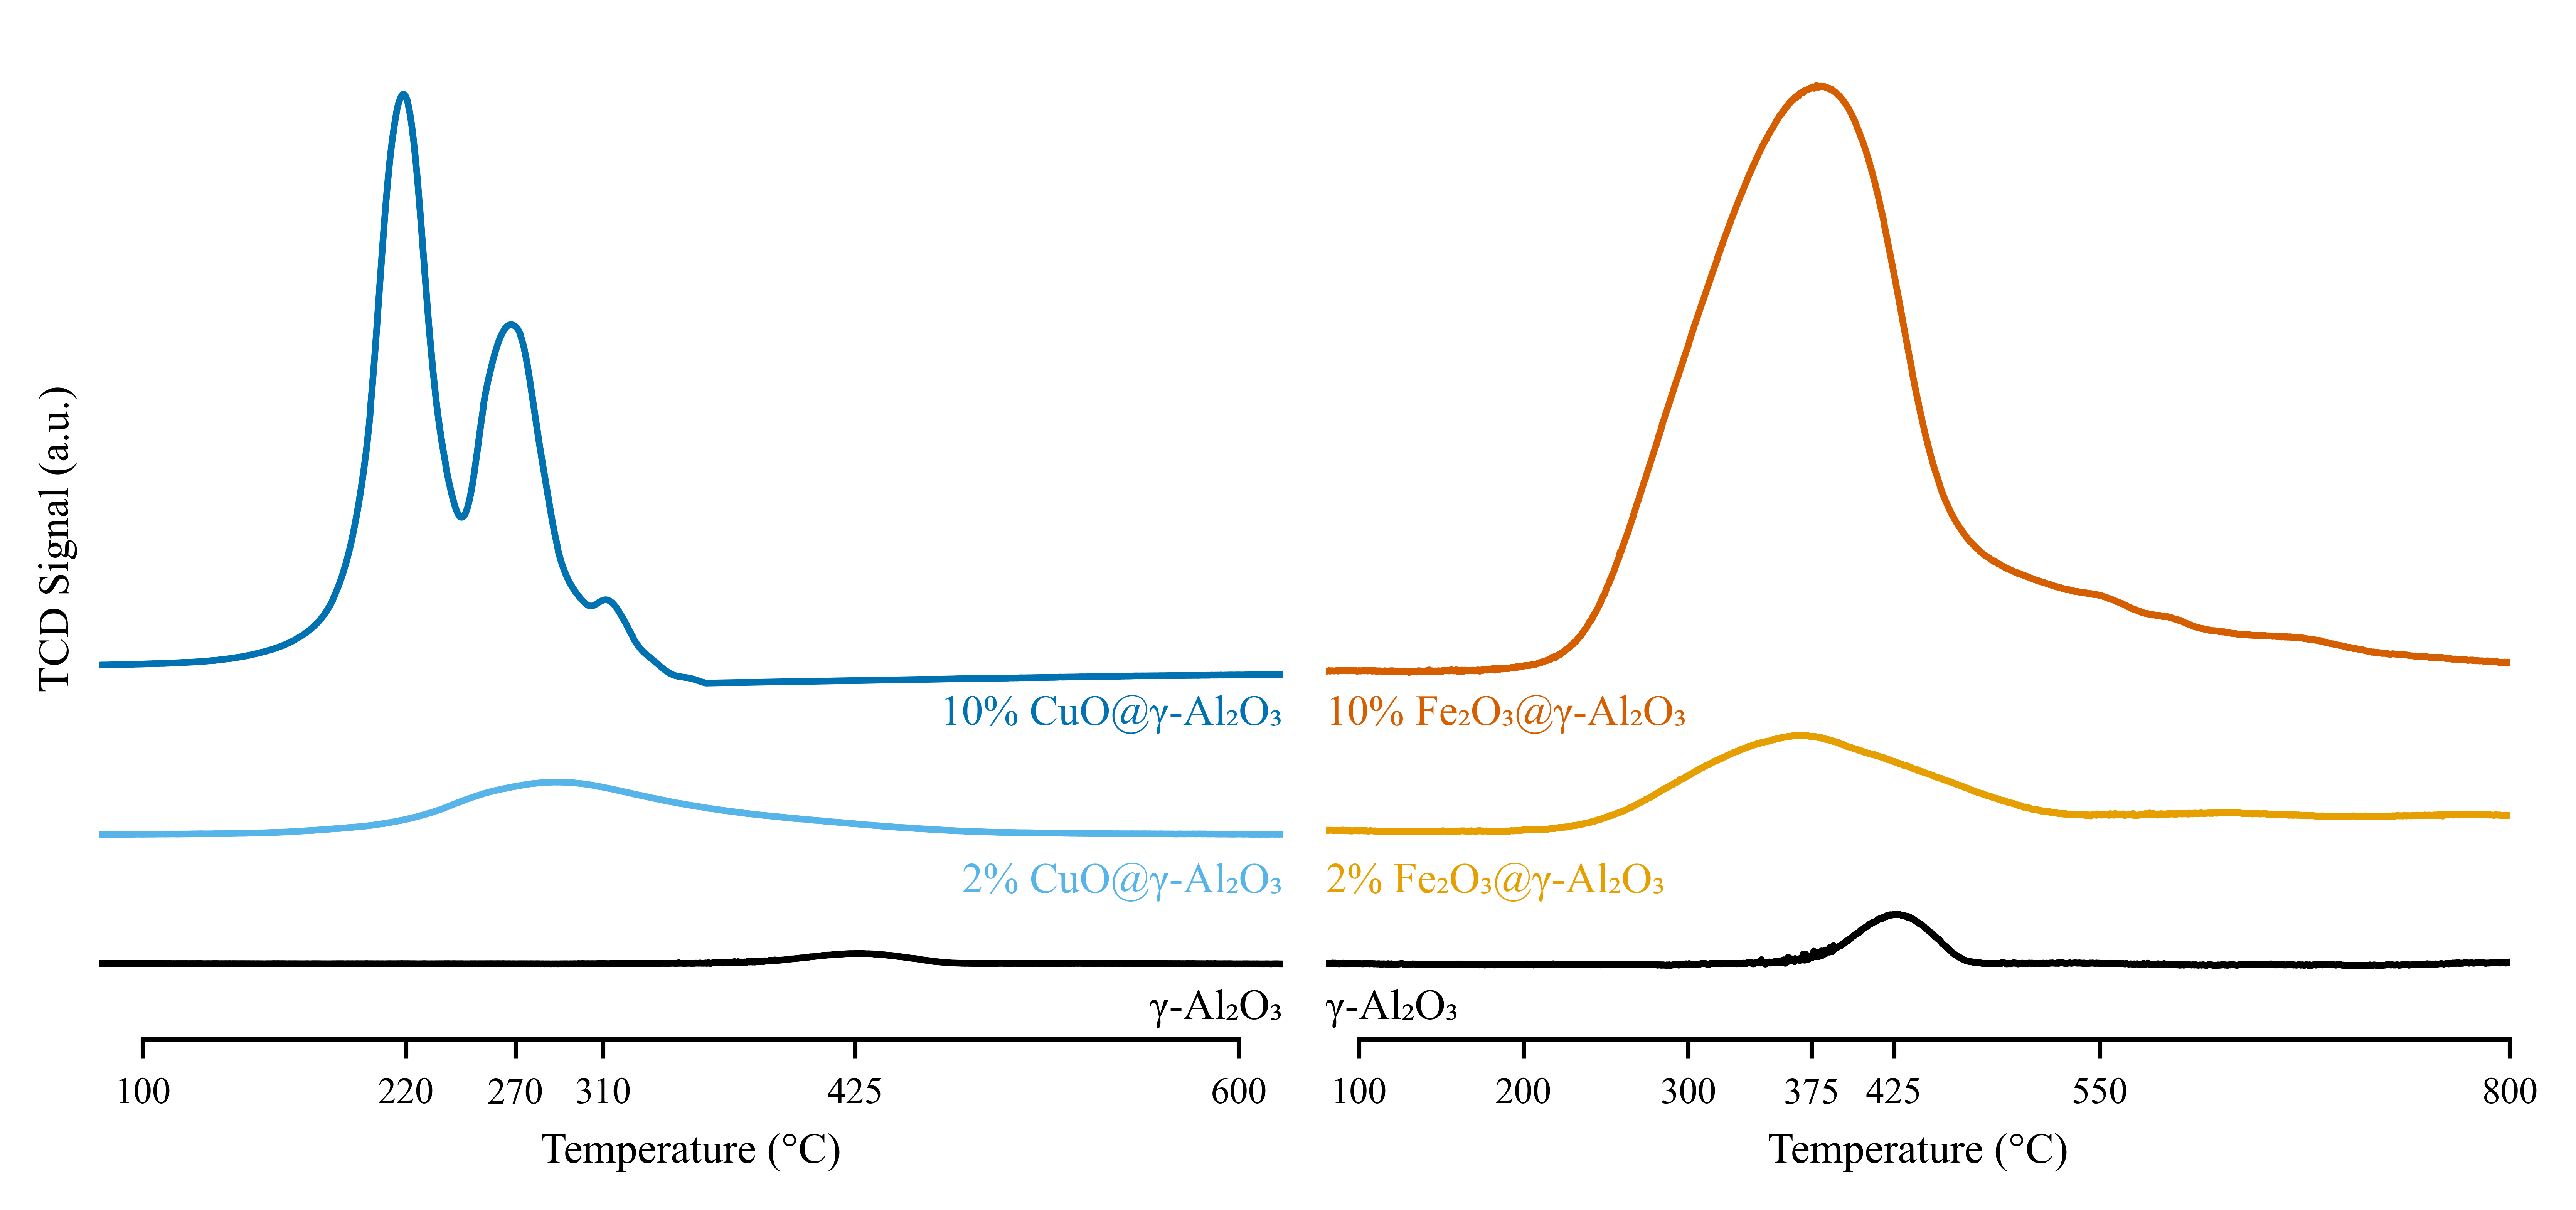

In [13]:
# Use Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# Set font size
plt.rcParams['font.size'] = 7

# Set the size of the figure in inches (1 inch = 25.4 mm)
fig = plt.figure(figsize=(170/25.4, 80/25.4), dpi = 1000)

# Create a grid of 1 row and 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

# Create the remaining four subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Create a line plot for the h2 tpr data for copper
sns.lineplot(
    x='temperature_celsius',
    y='signal_tcd_au_scaled_shifted',
    hue='material',
    hue_order=material_order,
    data=h2_tpr_data_Cu,
    palette=cb_colors,
    linewidth=1.25,
    legend=False,
    ax=ax1
)

# ax1 x-axis settings
ax1.spines['bottom'].set_bounds(100, 600)
ax1.set_xlabel(xlabel='Temperature (°C)', fontsize=8)
ax1.set_xlim([80, 620])
ax1.set_xticks([100, 220, 270, 310, 425, 600])
ax1.tick_params(axis='x', labelsize=7)

# ax1 y-axis settings
ax1.set_ylabel(ylabel='TCD Signal (a.u.)', fontsize=8)
ax1.set_ylim([0, 1.7])
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)

# Define the label points manually
label_points_Cu = {
    'γ-Al₂O₃': (620, 0.035),
    '2% CuO@γ-Al₂O₃': (620, 0.250),
    '10% CuO@γ-Al₂O₃': (620, 0.535)
}

# Loop through each item in label_points
# and add a text label with an offset
for material, (x, y) in label_points_Cu.items():
    ax1.annotate(
        text=material,
        xy=(x, y),
        xytext=(0, 0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material],
        horizontalalignment='right'
)

# Create a line plot for the h2 tpr data for iron
sns.lineplot(
    x='temperature_celsius',
    y='signal_tcd_au_scaled_shifted',
    hue='material',
    hue_order=material_order,
    data=h2_tpr_data_Fe,
    palette=cb_colors,
    linewidth=1.25,
    legend=False,
    ax=ax2
)

# ax2 x-axis settings
ax2.set_xlabel(xlabel='Temperature (°C)', fontsize=8)
ax2.set_xlim([80, 799])
ax2.spines['bottom'].set_bounds(100, 799)
ax2.set_xticks(
    ticks=[100, 200, 300, 375, 425, 550, 799],
    labels=[100, 200, 300, 375, 425, 550, 800]
)
ax2.tick_params(axis='x', labelsize=7)

# ax2 y-axis settings
ax2.yaxis.set_visible(False)
ax2.set_ylim([0, 1.7])

# Define the label points manually
label_points_Fe = {
    'γ-Al₂O₃': (80, 0.035),
    '2% Fe₂O₃@γ-Al₂O₃': (80, 0.250),
    '10% Fe₂O₃@γ-Al₂O₃':  (80, 0.535)
}

# Loop through each item in label_points
# and add a text label with an offset
for material, (x, y) in label_points_Fe.items():
    ax2.annotate(
        text=material,
        xy=(x, y),
        xytext=(0, 0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material]
)

# Remove the top and right spines
sns.despine(ax=ax1, left=True, top=True, right=True)
sns.despine(ax=ax2, left=True, top=True, right=True)

plt.tight_layout()
plt.savefig(
    r'C:\Users\sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_h2_tpr.pdf'
)
plt.show()